In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\rishv\OneDrive\Desktop\Projects\TCA_python\telecom_customer_churn.csv")

In [3]:
df.shape

(4835, 38)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        4835 non-null   object 
 1   Gender                             4835 non-null   object 
 2   Age                                4835 non-null   int64  
 3   Married                            4835 non-null   object 
 4   Number of Dependents               4835 non-null   int64  
 5   City                               4835 non-null   object 
 6   Zip Code                           4835 non-null   int64  
 7   Latitude                           4835 non-null   float64
 8   Longitude                          4835 non-null   float64
 9   Number of Referrals                4835 non-null   int64  
 10  Tenure in Months                   4835 non-null   int64  
 11  Offer                              2194 non-null   objec

In [5]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                2641
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                  

In [6]:
# Dropping multiple unrequired columns
df = df.drop(['Churn Reason', 'Churn Category', 'Offer'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        4835 non-null   object 
 1   Gender                             4835 non-null   object 
 2   Age                                4835 non-null   int64  
 3   Married                            4835 non-null   object 
 4   Number of Dependents               4835 non-null   int64  
 5   City                               4835 non-null   object 
 6   Zip Code                           4835 non-null   int64  
 7   Latitude                           4835 non-null   float64
 8   Longitude                          4835 non-null   float64
 9   Number of Referrals                4835 non-null   int64  
 10  Tenure in Months                   4835 non-null   int64  
 11  Phone Service                      4835 non-null   objec

In [8]:
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [9]:
df['Customer ID'].duplicated().sum()

np.int64(0)

# Customer status either they are churned or not.

In [10]:
df['Customer Status'].value_counts()

Customer Status
Stayed     3015
Churned    1586
Joined      234
Name: count, dtype: int64

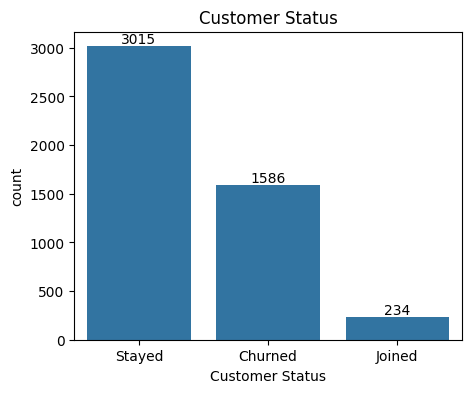

In [11]:
plt.figure(figsize = (5,4))
plt.title('Customer Status')
cs = sns.countplot(x = 'Customer Status', data = df)
cs.bar_label(cs.containers[0])
plt.show()

Around one third people did churn

# Percentage wise calculation of Customer_Status

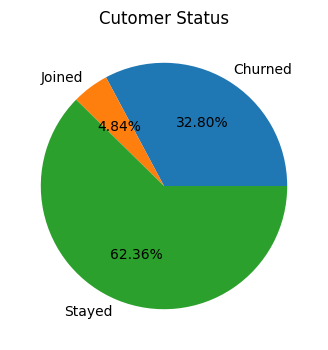

In [12]:
plt.figure(figsize = (4,4))
plt.title('Cutomer Status')
gb = df.groupby('Customer Status').agg({'Customer Status':'count'})
plt.pie(gb['Customer Status'], labels = gb.index, autopct = '%0.2f%%')
plt.show()

32.8% of customers are churning. 

# Gender-wise Churn Analysis

In [13]:
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


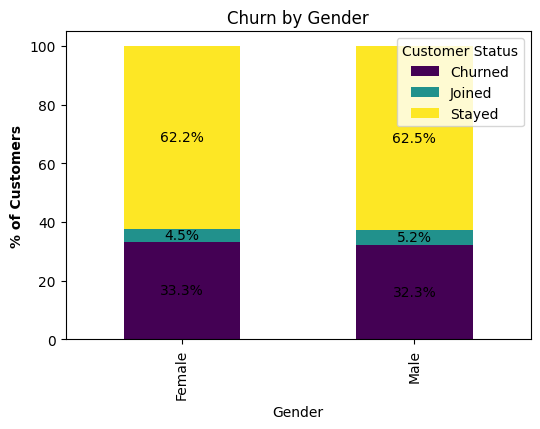

In [14]:
# Compute counts and convert to percentages
df_counts = df.groupby(['Gender', 'Customer Status']).size().unstack(fill_value=0)
df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(6, 4))                                   #fig: Represents the figure or canvas where the plot will be drawn,ax: Represents the axes,where the data will be visualized.
df_percent.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)     

# Add percentage labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2, f'{height:.1f}%', 
                    ha='center', va='center', fontsize=10, color='black', fontweight='light')

plt.title('Churn by Gender')
plt.ylabel('% of Customers', fontweight='bold')
plt.xlabel('Gender')
plt.legend(title='Customer Status', loc='best')
plt.show()

32.3% of male customers and 33.3% of female customers have churned, which conclude that customers of both genders are churning at almost equal rate.

# Tenure and Churn interconnection

In [15]:
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


Text(0.5, 1.0, 'Interconnection b/w tenure & customer churn')

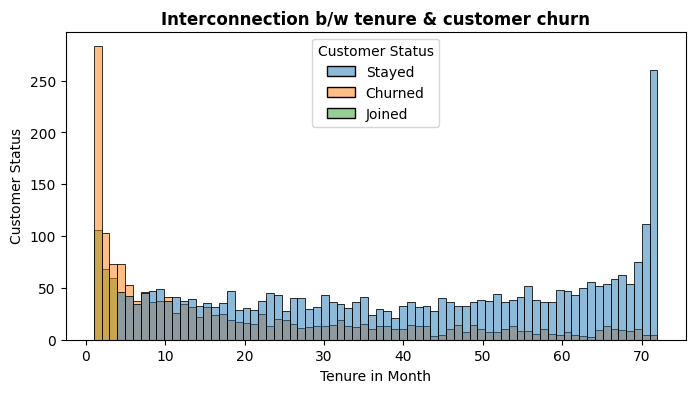

In [16]:
plt.figure(figsize = (8,4))
sns.histplot(x = 'Tenure in Months', data = df, hue = 'Customer Status', bins = 72)
plt.xlabel('Tenure in Month')
plt.ylabel('Customer Status')
plt.title('Interconnection b/w tenure & customer churn',  fontweight='bold')

Customers who have used the services for a long period of time tend to stay, whereas customers who have churned typically used the services for a much shorter duration.

# Revenue was generated by churned customers.

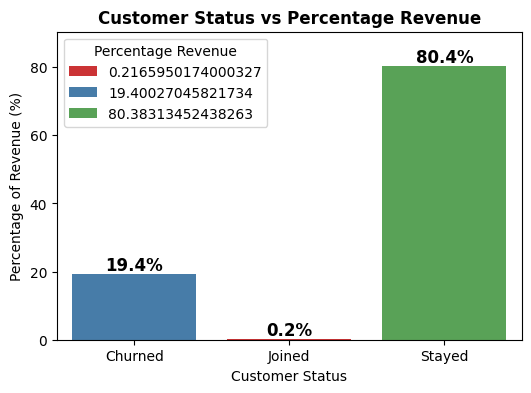

In [20]:
# Grouping and calculating percentage revenue
gb = df.groupby('Customer Status').agg({'Total Revenue': 'sum'}).reset_index()
gb['Percentage Revenue'] = (gb['Total Revenue'] / gb['Total Revenue'].sum()) * 100

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='Customer Status', y ='Percentage Revenue', data=gb, palette='Set1', hue ='Percentage Revenue')

# Adding percentage values on bars
for index, row in gb.iterrows():
    plt.text(index, row['Percentage Revenue'] + 1, f"{row['Percentage Revenue']:.1f}%", 
             ha='center', fontsize=12, fontweight='bold')


plt.title('Customer Status vs Percentage Revenue', fontweight='bold')
plt.xlabel('Customer Status')
plt.ylabel('Percentage of Revenue (%)')
plt.ylim(0, gb['Percentage Revenue'].max() + 10) 
# plt.tight_layout()
plt.show()

#19.4% of revenue was generated by churned customers

# Count of customers by Contract

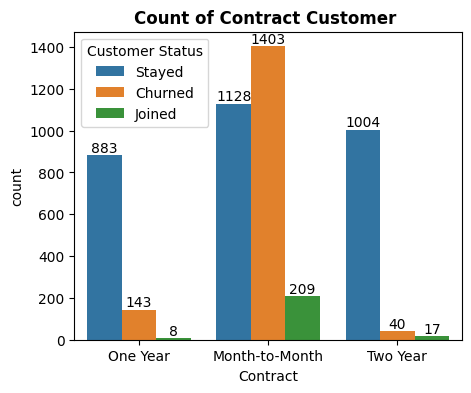

In [129]:
plt.figure(figsize = (5,4))
plt.title('Count of Contract Customer ',fontweight = 'bold')
cc = sns.countplot(x = 'Contract', data = df, hue= 'Customer Status')
cc.bar_label(cc.containers[0])
cc.bar_label(cc.containers[1])
cc.bar_label(cc.containers[2])
plt.show()

There are 1612 total customers on a month-to-month contract. Out of these, 1403 customers have churned.

# Customer Status by payment method

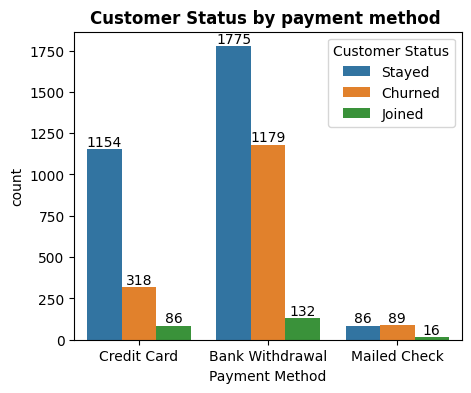

In [128]:
plt.figure(figsize = (5,4))
plt.title('Customer Status by payment method ',fontweight = 'bold')
cp = sns.countplot(x = 'Payment Method', data = df, hue= 'Customer Status')
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
cp.bar_label(cp.containers[2])
plt.show()

Customers using bank withdrawl payment have churned the most.

# Age Group vs Customer Status

In [104]:
df['Age Group'] = pd.cut(df['Age'], 
                         bins=[18, 30, 50, float('inf')], 
                         labels=['18-29', '30-50', '50+'], 
                         right=False)  # right=False makes the interval left-inclusive

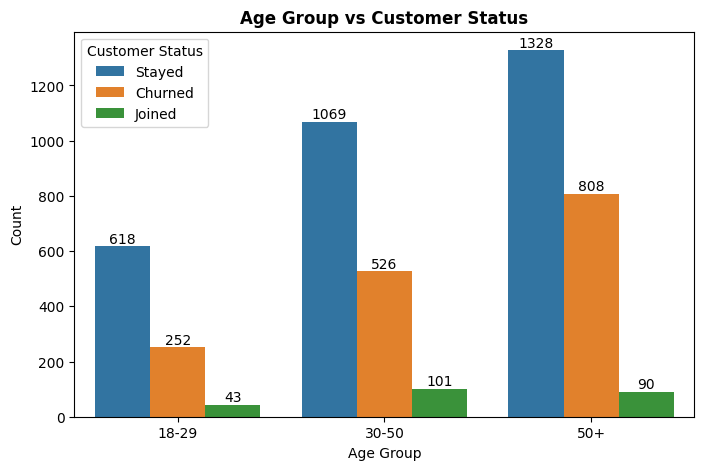

In [127]:
plt.figure(figsize=(8, 5))
ag =sns.countplot(x='Age Group', hue='Customer Status', data=df)
ag.bar_label(ag.containers[0])
ag.bar_label(ag.containers[1])
ag.bar_label(ag.containers[2])

# Labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group vs Customer Status', fontweight='bold')
plt.legend(title="Customer Status")
plt.show()

Customers of 50+ age group have churned the most.

In [115]:
df.columns.values

array(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Age Group'], dtype=object)

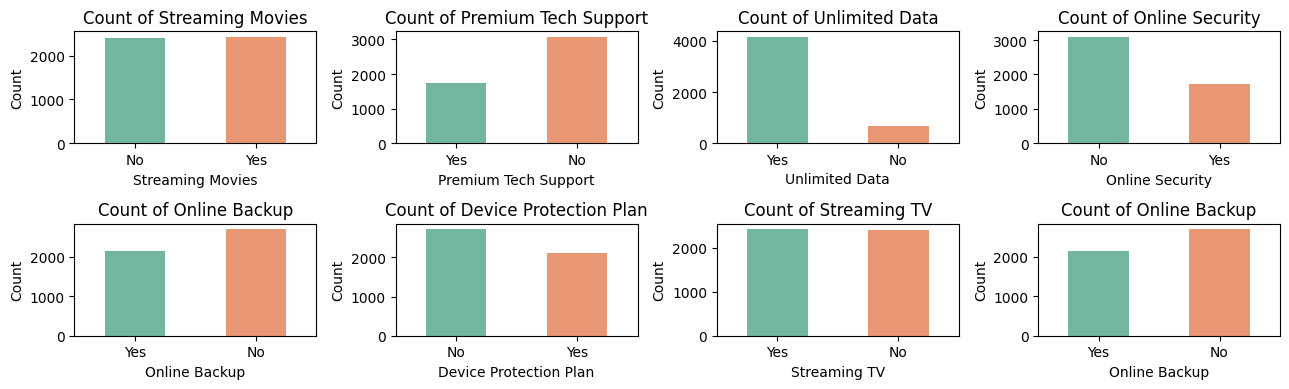

In [21]:
columns_to_plot = ['Streaming Movies', 'Premium Tech Support', 'Unlimited Data',
                  'Online Security', 'Online Backup', 'Device Protection Plan','Streaming TV', 'Online Backup']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(13,4))  # 2 rows, 4 columns

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot count plots
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=df[col], hue = df[col],ax=axes[i], palette='Set2', width = 0.5)
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()    
plt.show()

The count plots show how customers use different services. More people have Unlimited Data, but fewer use Premium Tech Support and Online Security. Streaming and Backup services are evenly split. This suggests that security and premium support services might need better marketing or improvements to attract more users.